# Installing and Importing Liberaries

In [6]:
!pip install tensorflow

In [3]:
 # Installs the stable version of data which is updated once a month
!pip install tensorflow-datasets

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [8]:
# viewing available Datasets in Tensorflow Datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

# Loading MNIST dataset

In [10]:
(nn_train, nn_test), nn_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  2.73 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  2.40 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:03<00:00,  1.03 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.06s/ url]


Dataset mnist downloaded and prepared to C:\Users\gdswa\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [11]:
# converting into dataframe
tfds.as_dataframe(nn_train.take(4), nn_info)

,image,label
0,,4
1,,1
2,,0
3,,7


**Visualizing Image**

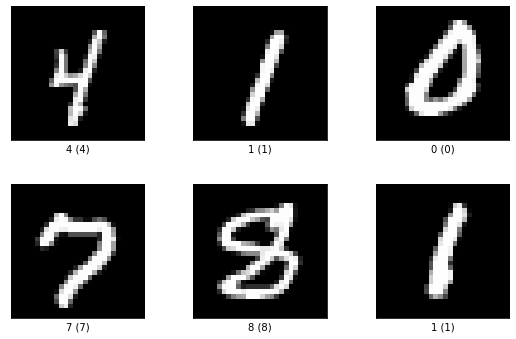

In [17]:
fig = tfds.show_examples(nn_train.take(6), nn_info)

**Trainig Pipeline**

In [18]:
def img_normalize(image,label):
    """Normalizes Images: 'uint8' -> 'flost32'."""
    return tf.cast(image,tf.float32) / 255., label

In [21]:
nn_train = nn_train.map(img_normalize, num_parallel_calls=tf.data.AUTOTUNE)
nn_train = nn_train.cache()
nn_train = nn_train.shuffle(nn_info.splits['train'].num_examples)
nn_train = nn_train.batch(128)
nn_train = nn_train.prefetch(tf.data.AUTOTUNE)

**Evalution Pipeline**

In [22]:
nn_test = nn_test.map(img_normalize, num_parallel_calls=tf.data.AUTOTUNE)
nn_test = nn_test.batch(128)
nn_test = nn_test.cache()
nn_test = nn_test.prefetch(tf.data.AUTOTUNE)

**Creating model and fitting data**

In [23]:
#creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [28]:
# compiling Model
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [37]:
# Fitting MOdel
history = model.fit(nn_train, epochs = 200, validation_data = nn_test)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1230 - sparse_categorical_accuracy: 0.9654 - val_loss: 22.6629 - val_sparse_categorical_accuracy: 0.9336
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1216 - sparse_categorical_accuracy: 0.9659 - val_loss: 22.7890 - val_sparse_categorical_accuracy: 0.9327
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1200 - sparse_categorical_accuracy: 0.9663 - val_loss: 23.1116 - val_sparse_categorical_accuracy: 0.9325
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9666 - val_loss: 22.6153 - val_sparse_categorical_accuracy: 0.9335
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9671 - val_loss: 22.8022 - val_sparse_categorical_accuracy: 0.9333
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1155 - sparse

**Plotting Training and Validation Loss**

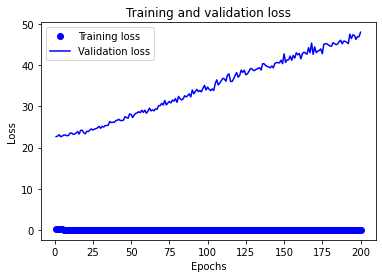

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting Training and Validation Accuracy**

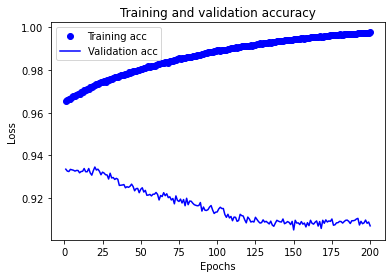

In [39]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()